# ST445 Managing and Visualizing Data

## Exploratory Data Analysis

### Milan Vojnovic and Christine Yuen, MT 2017

---

# A Day in Life @ GitHub

This notebook is about exploratory data analysis of GitHub user activity by analysing event log files collected from  [GitHub archive](https://www.githubarchive.org/).

The GitHub archive stores files that contain logs of various GitHub activity events, with each log entry containing information about the corresponding event such as timestamp, event type (e.g. Push, Create, and Watch), identity of the user who triggered this event, and the name of repository to which the event is directed. 

There are 20+ different event types. You may look up the definition of various events [here](https://developer.github.com/v3/activity/events/types/).

In this notebook, we are going to study events observed in a specific day. GitHub archive contains one file for each hour of a day. For example, events observed on March 2nd, 2015 (the first Monday of March) from 15:00 UTC until 16:00 UTC are stored in the file ```2015-03-02-15.json.gz```. This file can be downloaded by running the following command in a mac terminal:

```
curl http://data.githubarchive.org/2015-03-02-15.json.gz -o 2015-03-02-15.json.gz
```

or, using any other file transfer tool of your choice.

We have already cleaned up the data for the given day, so you can use it directly. The cleaned up data is stored in the file ```2015-03-2.csv```.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Part 1: Plotting, subplotting and histogram

In this section, we are going to reproduce some of the histograms that were shown in the lecture.

In [23]:
# load useful libraries
import numpy as np
import pandas as pd
import json
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

#Suppress Deprecation and Incorrect Usage Warnings 
import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
sns.reset_orig() # don't change the style of plots

In [24]:
# load the preprocessed dataset
fdate = '2015-03-02'

df = pd.read_csv(fdate + '.csv', parse_dates=['created_at'])

cum_ts = pd.Series(np.ones(len(df['created_at'])), index=df['created_at']) # series of ones

cum_ts = cum_ts.cumsum()

per_min_ts = df['created_at'].apply(lambda x: 60*x.hour + x.minute) # convert into minutes

### Check point 1.1:

What do ```cum_ts``` and ```per_min_ts``` store?

#### Answer: 

(answer to remove)


```cum_ts```: the cumulative number of GitHub events

```per_min_ts```: event time in minutes since the start of the day

## Line chart

### Cumulative events count

Consider the histogram plot on the lecture slide "Cumulative events count". Try to reproduce the histogram by using ```cum_ts``` pandas series created above. 

Hints:
1. Use ```plt.subplots()``` to adjust the figure size.
2. Recall that we can plot pandas series directly by calling ```plot()```.
2. You may find the ```set_xlim()``` and ```pd.Timestamp()``` functions useful to set the x-axis tick labels.

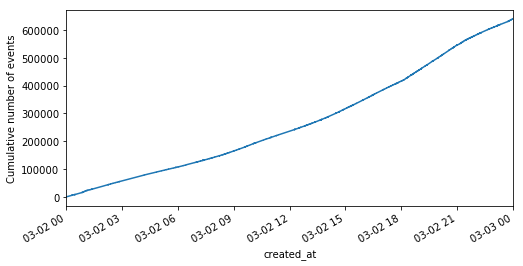

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))

cum_ts.plot()

ax.set_xlim(pd.Timestamp(fdate + ' 00:00:00.00', tz=None), pd.Timestamp(fdate + ' 23:59:59.999999', tz=None))
ax.set_ylabel('Cumulative number of events');

In [26]:
print(pd.Timestamp(fdate + ' 00:00:00.00', tz=None))

2015-03-02 00:00:00


## Histograms

Here we provide the code for producing the plot showing the number of events per one-minute time slot. You need to to produce other histograms by yourself.

## Differenced time series

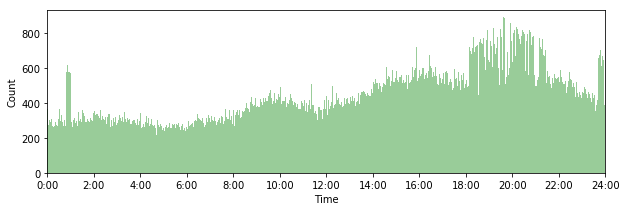

In [27]:
fig, ax = plt.subplots(figsize=(10, 3))

per_min_n_event, _bins, _patches = plt.hist(per_min_ts, range(24*60+1), facecolor='g', edgecolor="none", alpha=0.4)

plt.xticks(60*np.arange(0, 26, 2), ('0:00', '2:00', '4:00', '6:00', '8:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'))
plt.xlim([0, 24*60])
plt.xlabel('Time')
plt.ylabel('Count');

### Check point 1.2:

1. What does ```per_min_n_event``` store?
2. What does ```_patches``` and what is the possible use of it? 
3. What does ```xticks()``` do?

Hint: information about patches [here](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch)

#### Answer: 
(answer to remove)
1. ```per_min_n_event``` stores the number of events at each minute of the given day.
2. ```_patches``` stores patches used (a collection of rectangles) to create the histogram. The patches can be used to change the properties of individual bars. 
3. Set the x tick labels.

In [28]:
print(_patches)
print(_patches[3]) # specific patch

<a list of 1440 Patch objects>
Rectangle(3,0;1x275)


## Empirical cumulative distribution function

Consider the histogram shown on the lecture slide "Empirical cumulative distribution function". Try to reproduce the histogram by using ```per_min_n_event```. 

Hint: you may either use ```hist()``` matplotlib.pyplot function or ```distributions.ECDF()``` statsmodels.api function.

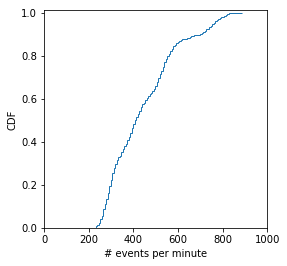

In [29]:
# method 1:
n_bins = 100

fig, ax = plt.subplots(figsize=(4, 4))
_n, _bins, patches = ax.hist(per_min_n_event, n_bins, normed=1, histtype='step', cumulative=1)

ax.set_xlabel('# events per minute')
ax.set_ylabel('CDF')
ax.set_xlim([0,1000])
ax.set_ylim([0,1.01])
patches[0].set_xy(patches[0].get_xy()[:-1]) # a hack to remove the last point y = 0

In [30]:
patches

print(patches)

for p in patches:
    print(p)
patches[0].get_xy()[-5:]


<a list of 1 Patch objects>
Poly((218, 0) ...)


array([[ 872.64      ,    0.99791667],
       [ 872.64      ,    0.99861111],
       [ 879.32      ,    0.99861111],
       [ 879.32      ,    1.        ],
       [ 886.        ,    1.        ]])

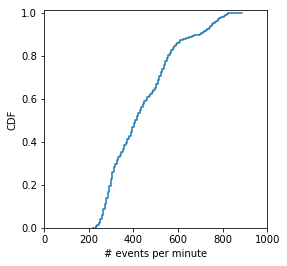

In [50]:
import statsmodels.api as sm 

# method 2:
fig, ax = plt.subplots(figsize=(4, 4))

ecdf = sm.distributions.ECDF(per_min_n_event)

x = np.linspace(min(per_min_n_event), max(per_min_n_event), 100)
y = ecdf(x)

ax.step(x, y)
ax.set_xlabel('# events per minute')
ax.set_ylabel('CDF')
ax.set_xlim([0,1000])
ax.set_ylim([0,1.01])

plt.show();

In [32]:
ecdf

## Stepfilled histogram 

Consider the slide on the lecture slide "Histogram". Try to reproduce the histogram shown therein by using ```per_min_n_event```.

Hint: pass ```histtype=stepfilled``` as one of the arguments when calling ```hist()```

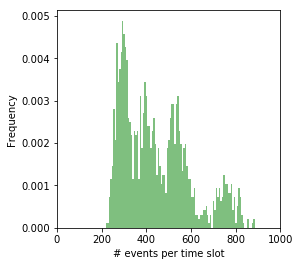

In [51]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.hist(per_min_n_event, n_bins, normed=1, histtype='stepfilled', facecolor='g', edgecolor='none', alpha=0.5)

ax.set_xlabel('# events per time slot')
ax.set_ylabel('Frequency')
ax.set_xlim([0,1000]);

## Histogram: show time series conditional on the event type

### Prepare the data

In [34]:
etypes = ['PushEvent', 'IssueCommentEvent', 'CreateEvent', 'WatchEvent', 'IssuesEvent','Other']
n_etypes = []

for etype in etypes:
    
    type_ts = pd.Series()
    
    if etype == 'Other':
        type_ts = df[~df['type'].isin(etypes)]['created_at'].apply(lambda x: 60*x.hour + x.minute)  
    else:
        type_ts = df[df['type']==etype]['created_at'].apply(lambda x: 60*x.hour + x.minute)
    
    n, _bins = np.histogram(type_ts, bins=range(24*60+1))
    
    n_etypes.append(n)

### Check point 1.3:

What does ```n_etypes``` contain?

#### Answer:

(answer to remove)

The number of events of specified type for each minute of the day. 

In [35]:
n_etypes[:5]

[array([226, 169, 179, ..., 186, 180, 200]),
 array([ 14,  25,  24, ...,  46, 193, 194]),
 array([32, 40, 50, ..., 47, 40, 49]),
 array([27, 18, 26, ..., 25, 25, 37]),
 array([ 17,  19,   7, ...,  23, 102, 113])]

### Plot the histogram

Consider the histogram shown on the lecture slide "Time series conditional on the event type". Reproduce the histogram by using ```n_etypes``` created above.

Hint: use ```stackplot()```

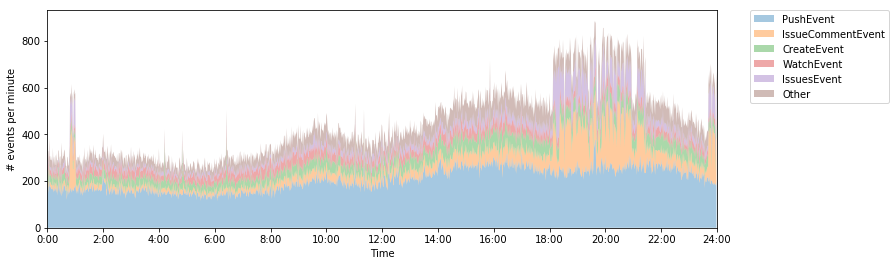

In [36]:
fig, ax = plt.subplots(figsize=(12, 4))

bins = range(24*60+1)

ax.stackplot(bins[:-1], n_etypes, edgecolor='none', alpha = 0.4)

plt.xticks(60*np.arange(0, 26, 2), ('0:00', '2:00', '4:00', '6:00', '8:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'))
plt.xlim([0, 24*60])
plt.xlabel('Time')
plt.ylabel('# events per minute')
plt.legend(etypes, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

For the definition of parameters of the ```legend()``` function see this [section](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) of the matplotlib.pyplot API guide and this [section](https://matplotlib.org/users/legend_guide.html) of the Matplotlib tutorial.

## Homework Q1: Smoothed histograms

1. What do the histograms on the lecture slide "Histogram (cont’d)" show? 
2. Reproduce the histograms using ```per_min_n_event```. 

Hint: 
1. Check the seaborn library for the function ```distplot()```.
2. Set the parameters of this function such as ```kde```, ```hist```, ```rug``` and ```kde_kws```.

In [37]:
# your code

# Part 2: Boxplot, notched boxplot and violin plot

## Boxplot

Consider the boxplots shown on the lecture slide "A use case: comparing parallel batches of data". Try to reproduce the boxplots shown therein.

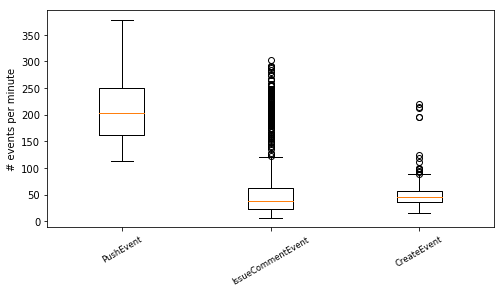

In [38]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.boxplot(n_etypes[0:3]);

ax.set_ylabel('# events per minute')
ax.set_xticklabels(['PushEvent', 'IssueCommentEvent', 'CreateEvent'], rotation=30, fontsize='small');

## Notched boxplot

Change the boxplots presented above to notched boxplots.

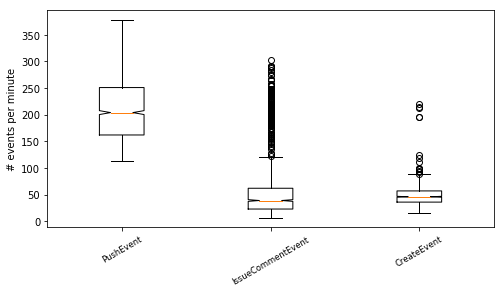

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.boxplot(n_etypes[0:3], notch=True);

ax.set_ylabel('# events per minute')
ax.set_xticklabels(['PushEvent', 'IssueCommentEvent', 'CreateEvent'], rotation=30, fontsize='small');

## Violin plot

Reproduce the violin plot shown on the lecture slide "Violin plots for parallel batches of data". What information is contained in a violin plot and not in a box plot?

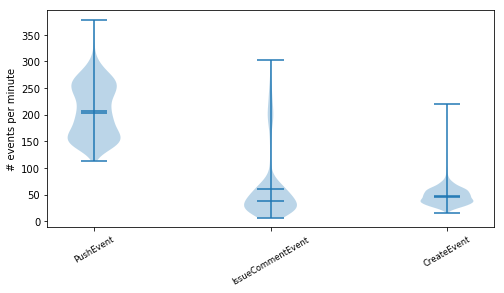

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))

pos = [1, 2, 3]

plt.violinplot(n_etypes[0:3], pos, points=100, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)

ax.set_ylabel('# events per minute')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['PushEvent', 'IssueCommentEvent', 'CreateEvent'], rotation=30, fontsize='small');

## Homework Q2: Violin plots with conditioning

Take a look at the violin plot shown in the lecture slide "Violin plots with conditioning". "yes" means that there is "org.login" information whereas "no" means there is none. 

1. What do these plots show?
2. Reproduce the plots. 

Hints: 
1. Conditional on the event type and whether or not it is directed to an organizational repository, compute the count using ```np.histogram()``` function. You may have a look at how ```n_etypes``` was calculated earlier in this notebook.
2. Use ```sns.violinplot()```. You may want to set the parameters ```hue``` and ```split```.
3. What do you observe from the plots? In particular, for PushEvent, does org.login = yes or no make a difference?

In [41]:
# your code

# Part 3: Bar plot

## Simple bar plot

We reproduce the first two bar plots shown in the lecture slides. 

Note that the bar plot shown on the lecture slide "Bar plots" is modified to a vertical bar plot here.

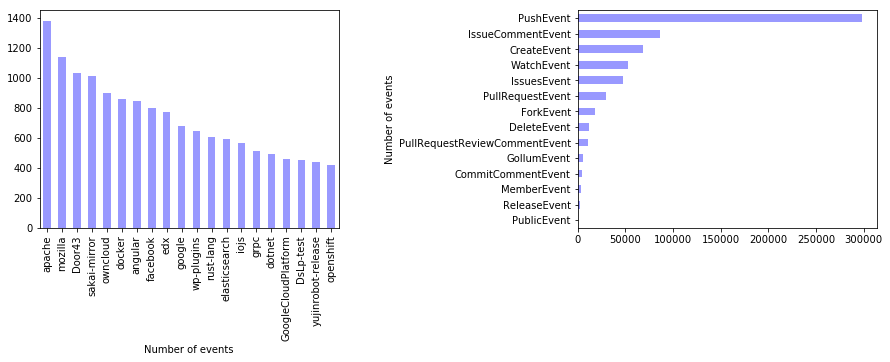

In [42]:
org_df = df.groupby('org.login')['org.login'].agg('count')

event_df = df.groupby('type')['type'].agg('count')

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 4))

org_df.sort_values(ascending=False).head(20).plot(kind='bar', color='b', alpha=0.4, ax=axes[0])
#org_df.sort_values(ascending=True).tail(20).plot(kind='bar', color='b', alpha=0.4, ax=axes[0])

axes[0].set_xlabel('Number of events')

event_df.sort_values().plot(kind='barh', color='b', alpha=0.4, ax=axes[1])

axes[1].set_ylabel('Number of events')

fig.subplots_adjust(wspace=0.8);

## Grouped and stacked bar plot

Consider the fourth bar plot in the lecture slide deck. How is it different from the fifth and the sixth bar plot? Reproduce all these three bar plots.

Hint:
1. Group the data by using ```groupby()``` and ```size()```.
2. You may first separate the case when ```org.login``` is null and when it is not null, and then put the results together.
3. Produce the bar plot by ```plot.bar()``` and set the argnment ```stacked``` when needed.

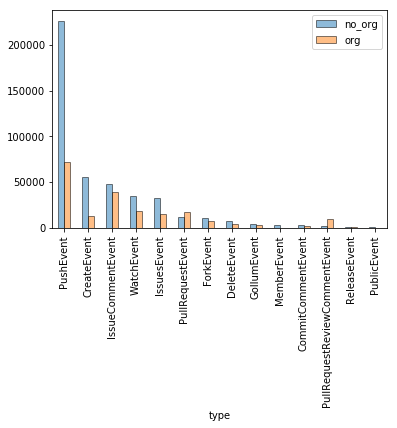

In [43]:
event_wo_org_df = df[df['org.login'].isnull()]
event_wo_org_df = event_wo_org_df.groupby('type').size()
event_wo_org_df = event_wo_org_df.rename("no_org")

event_w_org_df = df[df['org.login'].notnull()]
event_w_org_df = event_w_org_df.groupby('type').size()
event_w_org_df = event_w_org_df.rename("org")

event_by_org_df = pd.concat([event_wo_org_df, event_w_org_df], axis=1).sort_values(by='no_org', ascending=False)

event_by_org_df.plot.bar(edgecolor='none', alpha = 0.5);

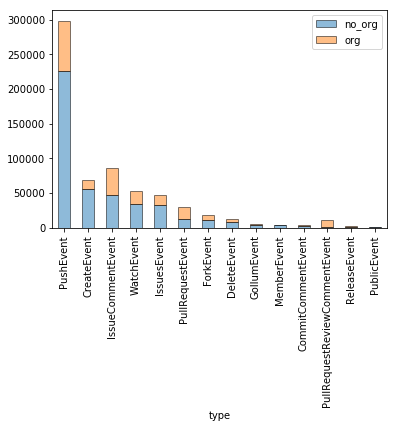

In [44]:
event_by_org_df.plot.bar(stacked=True, edgecolor='none', alpha = 0.5);

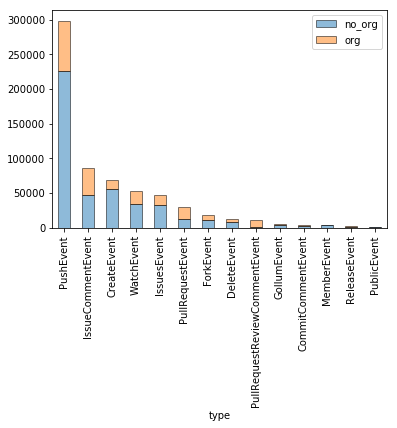

In [45]:
event_by_org_df['Sum'] = event_by_org_df['org'] + event_by_org_df['no_org']

event_by_org_df.sort_values(by='Sum', ascending=False).plot.bar(y=['no_org', 'org'],
                                                                stacked=True, edgecolor='none', alpha = 0.5);

## Homework Q3: Grouped bar plot of the frequency of event types for each hour of  the day

Consider the bar plot shown on the lecture slide with three different colors of bars. Try to reproduce this bar plot. 

Hint: 
1. Use ```groupby()```, ```size()``` and ```reset_index()``` functions for dataframe to group the data by hour and event types.
2. Use ```pivot()``` to convert data from long to wide format.
3. Select only 'PushEvent', 'IssueCommentEvent' and 'CreateEvent'.
4. Use the ```plot()``` function and pass the argument ```kind="bar"```.

In [46]:
# your code

# Part 4: Scatter plot

We provide you with the code to produce the first scatter plot in the lecture slide deck. You have to produce the other scatter plots shown in the lecture slide deck yourself.

## Simple scatter plot

Here we produce the scatter plot shown on the lecture slide "Scatter plot". Discuss the relation between the two types of events.

(0, 400)

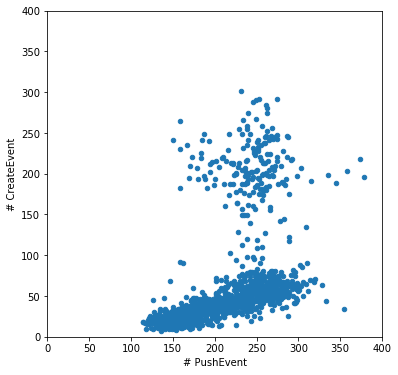

In [47]:
scatter_2_df = pd.DataFrame(np.array(n_etypes[0:2]).T, 
                          columns=['num_'+etype for etype in etypes[0:2]])

ax = scatter_2_df.plot.scatter('num_'+etypes[0], 'num_'+etypes[1], figsize=(6, 6))

ax.set_xlabel('# '+etypes[0])
ax.set_ylabel('# '+etypes[2])
ax.set_xlim([0,400])
ax.set_ylim([0,400])

## Scatter plot with marginal distributions/kernel density estimation

Consider the scatter plots in the lecture slides with the title "Scatter plot (cont’d)". Reproduce the two scatter plots by using ```sns.jointplot()```.

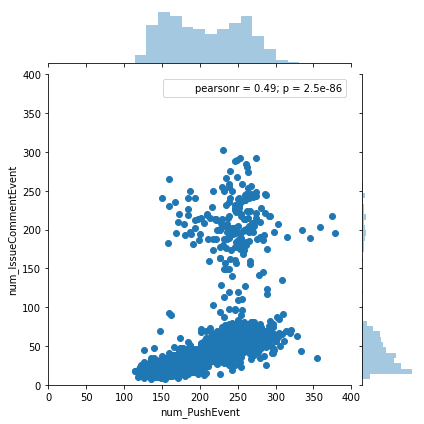

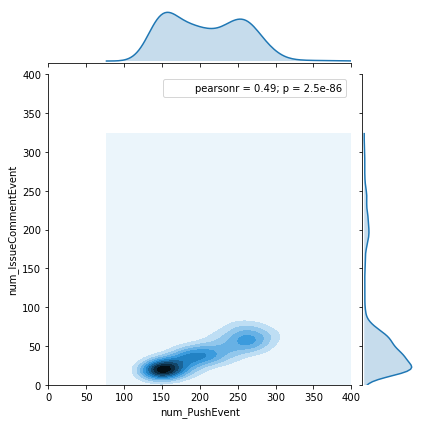

In [48]:
sns.jointplot(x='num_'+etypes[0], y='num_'+etypes[1], data=scatter_2_df, xlim=[0, 400], ylim=[0,400]);

sns.jointplot(x='num_'+etypes[0], y='num_'+etypes[1], data=scatter_2_df, xlim=[0, 400], ylim=[0,400], kind='kde');

## Homework Q4: Scatter matrix

Take a look at the scatter plots shown on the lecture slides "Scatter matrix" and "Scatter matrix (cont’d)" (first one).

1. What is shown in these scatter matrices? Discuss.
2. Reproduce the scatter matrices (one with histogram and one with estimated density). Hints: you may use either ```scatter_matrix()``` from ```pandas.plotting``` or ```sns.pairplot()``` from seaborn.
3. Briefly discuss what you observe from the scatter matrices? 

In [49]:
# your code